In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [5]:
data=load_iris()

In [13]:
df=pd.DataFrame(data=data['data'] , columns = data['feature_names'])

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_scaled=std.fit_transform(df)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=2)

In [20]:
pca_scaled=pca.fit_transform(X_scaled)

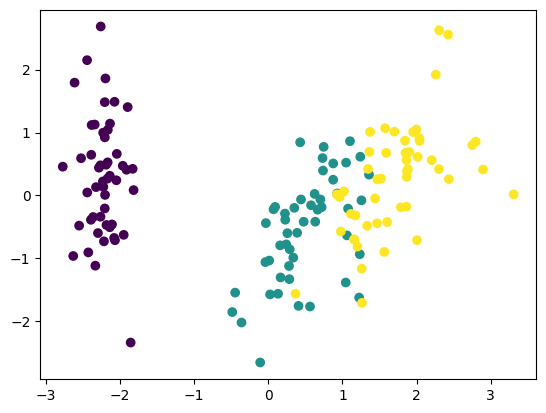

In [21]:
plt.scatter(pca_scaled[: , 0] , pca_scaled[: , 1] , c=data['target'])

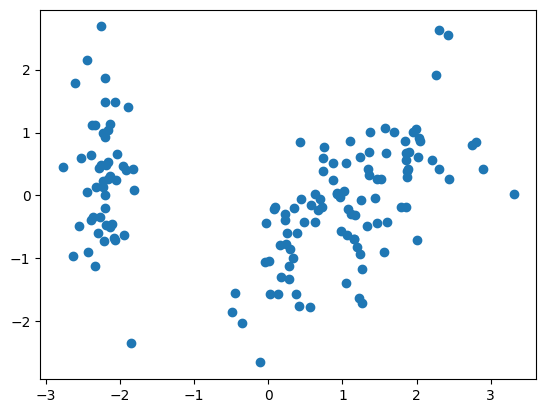

In [23]:
plt.scatter(pca_scaled[: , 0] ,pca_scaled[: , 1])

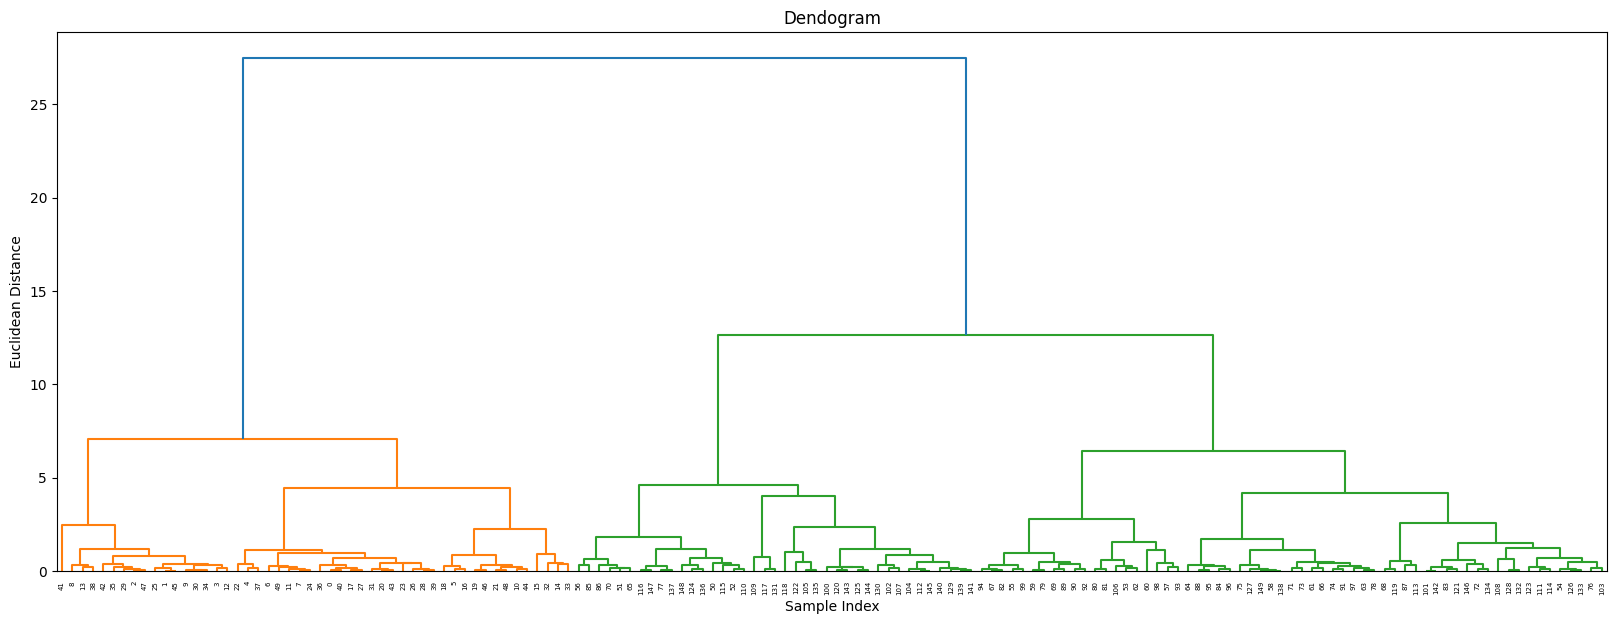

In [38]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title('Dendogram')
sc.dendrogram(sc.linkage(pca_scaled , method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

## Search for the longest vertical line such that no horizontal line passes through it 


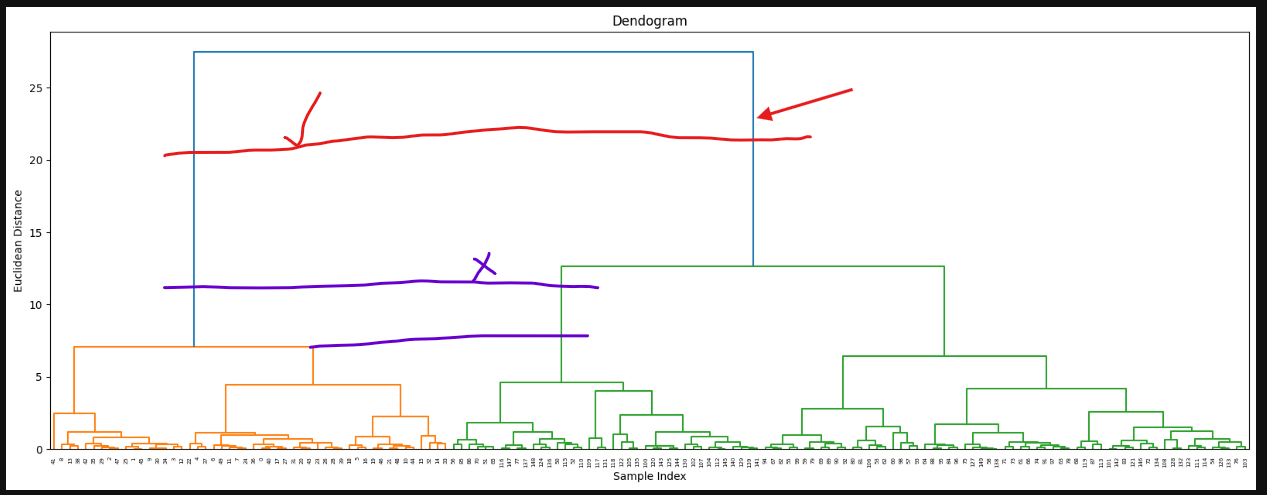

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2 , affinity='euclidean' , linkage='ward')
cluster.fit(pca_scaled)

C:\Users\Mohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [28]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

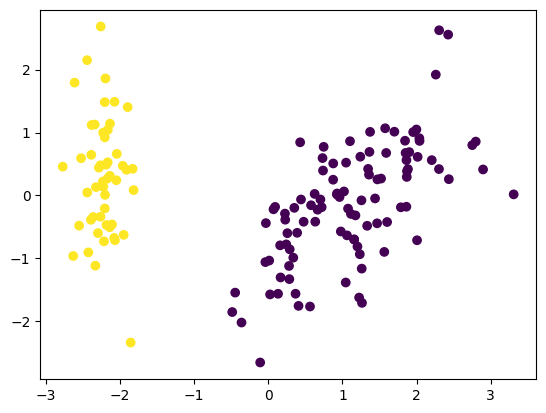

In [29]:
plt.scatter(pca_scaled[: , 0] , pca_scaled[: , 1] , c=cluster.labels_)

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.metrics import silhouette_score

silhouette_coef=[]

for k in range(2 , 11):
    algo=AgglomerativeClustering(n_clusters=k , affinity='euclidean' , linkage='ward')
    algo.fit(pca_scaled)
    score=silhouette_score(pca_scaled , algo.labels_)
    silhouette_coef.append(score)

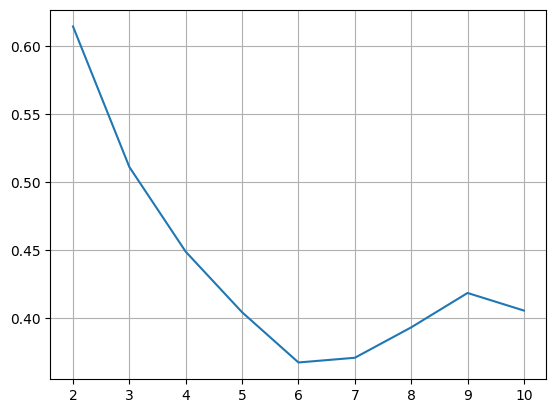

In [36]:
plt.plot(range(2 , 11) , silhouette_coef)
plt.grid()